In [ ]:
import shutil
shutil.rmtree('Variational-Sparse-Coding')

In [6]:
!git clone https://github.com/Alfo5123/Variational-Sparse-Coding.git

Cloning into 'Variational-Sparse-Coding'...
remote: Enumerating objects: 123, done.
remote: Counting objects: 100% (123/123), done.
remote: Compressing objects: 100% (95/95), done.
remote: Total 1515 (delta 74), reused 65 (delta 28), pack-reused 1392
Receiving objects: 100% (1515/1515), 119.92 MiB | 41.37 MiB/s, done.
Resolving deltas: 100% (187/187), done.


In [ ]:
import os
os.chdir('Variational-Sparse-Coding')

In [ ]:
os.makedirs('data/dsprites', exist_ok=True)

In [9]:
!wget --header="Host: raw.githubusercontent.com" --header="User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/72.0.3626.121 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8" --header="Accept-Language: en-US,en;q=0.9,pt-BR;q=0.8,pt;q=0.7,es-419;q=0.6,es;q=0.5" --header="Referer: https://github.com/deepmind/dsprites-dataset/blob/master/dsprites_ndarray_co1sh3sc6or40x32y32_64x64.npz" "https://raw.githubusercontent.com/deepmind/dsprites-dataset/master/dsprites_ndarray_co1sh3sc6or40x32y32_64x64.npz" -O "dsprites_ndarray_co1sh3sc6or40x32y32_64x64.npz" -c

--2019-03-11 03:46:44--  https://raw.githubusercontent.com/deepmind/dsprites-dataset/master/dsprites_ndarray_co1sh3sc6or40x32y32_64x64.npz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19318135 (18M) [application/octet-stream]
Saving to: ‘dsprites_ndarray_co1sh3sc6or40x32y32_64x64.npz’

dsprites_ndarray_co 100%[===================>]  18.42M   105MB/s    in 0.2s    

2019-03-11 03:46:44 (105 MB/s) - ‘dsprites_ndarray_co1sh3sc6or40x32y32_64x64.npz’ saved [19318135/19318135]



In [10]:
import shutil
shutil.move('dsprites_ndarray_co1sh3sc6or40x32y32_64x64.npz', 'data/dsprites/dsprites_ndarray_co1sh3sc6or40x32y32_64x64.npz')


'data/dsprites/dsprites_ndarray_co1sh3sc6or40x32y32_64x64.npz'

## Train model

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings('ignore', '', UserWarning)

import torch
torch.manual_seed(1)
torch.cuda.manual_seed(1)

In [12]:
dataset_params = {
    'dataset': 'dsprites',
    'batch_size': 32,
    'cuda': True,
    'root': 'data'
}

from src.utils import get_datasets
train_loader, test_loader, (width, height, channels) = get_datasets(
    **dataset_params)

Loading dsprites dataset...
Done!



In [ ]:
images, _ = iter(test_loader).next()


In [16]:
%%time
from src.models.conv_vsc import ConvolutionalVariationalSparseCoding

model_params = {
    'dataset': 'dsprites',
    'width': width,
    'height': height,
    'channels': channels,
    'kernel_szs': '32,32,64,64',
    'hidden_sz': 256,
    'latent_sz': 100,
    'learning_rate': 3e-4,
    
    'alpha': 0.1,
    'beta': 1.25,
    'beta_delta': 0,
    'c': 100,
    'c_delta': 1e-3, 
    
    'device': 'cuda',
    'log_interval': 5000,
    'normalize': False,
    'flatten': False
}

convvsc = ConvolutionalVariationalSparseCoding(**model_params)


CPU times: user 16.4 ms, sys: 17 ms, total: 33.4 ms
Wall time: 32.6 ms


In [15]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving convvsc_dsprites_9e.pth to convvsc_dsprites_9e.pth
User uploaded file "convvsc_dsprites_9e.pth" with length 3852815 bytes


In [17]:
%%time
training_params = { 
    'train_loader': train_loader,
    'test_loader': test_loader,
    'epochs': 9, 
    'report_interval': 3,
    'sample_sz': 64,
    'reload_model': False,
    'checkpoints_path': 'results/checkpoints',
    'logs_path': 'results/logs',
    'images_path': 'results/images'
}

convvsc.run_training(**training_params)

Instructions for updating:
Colocations handled automatically by placer.
Training ConvVSC model...
Train Epoch: 1 [0/600000 (0%)]	Loss: 2712.220703
Train Epoch: 1 [160000/600000 (27%)]	Loss: 140.437881
Train Epoch: 1 [320000/600000 (53%)]	Loss: 123.900734
Train Epoch: 1 [480000/600000 (80%)]	Loss: 108.689331
====> Epoch: 1 Average loss: 139.4502
====> Test set loss: 114.1669 - VLB-ConvVSC : 3653.3401
Train Epoch: 2 [0/600000 (0%)]	Loss: 133.782608
Train Epoch: 2 [160000/600000 (27%)]	Loss: 106.619751
Train Epoch: 2 [320000/600000 (53%)]	Loss: 118.217453
Train Epoch: 2 [480000/600000 (80%)]	Loss: 106.102493
====> Epoch: 2 Average loss: 108.3668
====> Test set loss: 102.8769 - VLB-ConvVSC : 3292.0618
Train Epoch: 3 [0/600000 (0%)]	Loss: 115.467216
Train Epoch: 3 [160000/600000 (27%)]	Loss: 90.937813
Train Epoch: 3 [320000/600000 (53%)]	Loss: 104.879028
Train Epoch: 3 [480000/600000 (80%)]	Loss: 84.285805
====> Epoch: 3 Average loss: 96.3852
====> Test set loss: 92.9717 - VLB-ConvVSC : 297

In [30]:
%%time
training_params = { 
    'train_loader': train_loader,
    'test_loader': test_loader,
    'epochs': 3, 
    'report_interval': 3,
    'sample_sz': 64,
    'reload_model': False,
    'checkpoints_path': 'results/checkpoints',
    'logs_path': 'results/logs',
    'images_path': 'results/images'
}

convvsc.run_training(**training_params)

Training ConvVSC model...
Train Epoch: 1 [0/600000 (0%)]	Loss: 77.597610
Train Epoch: 1 [160000/600000 (27%)]	Loss: 85.099274
Train Epoch: 1 [320000/600000 (53%)]	Loss: 84.438942
Train Epoch: 1 [480000/600000 (80%)]	Loss: 77.054588
====> Epoch: 1 Average loss: 74.6979
====> Test set loss: 74.0563 - VLB-ConvVSC : 2369.8015
Train Epoch: 2 [0/600000 (0%)]	Loss: 79.492912
Train Epoch: 2 [160000/600000 (27%)]	Loss: 69.008430
Train Epoch: 2 [320000/600000 (53%)]	Loss: 74.975876
Train Epoch: 2 [480000/600000 (80%)]	Loss: 83.108536
====> Epoch: 2 Average loss: 73.0094
====> Test set loss: 70.6640 - VLB-ConvVSC : 2261.2468
Train Epoch: 3 [0/600000 (0%)]	Loss: 68.252579
Train Epoch: 3 [160000/600000 (27%)]	Loss: 69.974670
Train Epoch: 3 [320000/600000 (53%)]	Loss: 70.830452
Train Epoch: 3 [480000/600000 (80%)]	Loss: 71.950256
====> Epoch: 3 Average loss: 70.4180
====> Test set loss: 72.3812 - VLB-ConvVSC : 2316.1987
CPU times: user 18min 39s, sys: 2min, total: 20min 40s
Wall time: 24min 51s


In [34]:
%%time
training_params = { 
    'train_loader': train_loader,
    'test_loader': test_loader,
    'epochs': 3, 
    'report_interval': 3,
    'sample_sz': 64,
    'reload_model': False,
    'checkpoints_path': 'results/checkpoints',
    'logs_path': 'results/logs',
    'images_path': 'results/images'
}

convvsc.run_training(**training_params)

Training ConvVSC model...
Train Epoch: 1 [0/600000 (0%)]	Loss: 68.209648
Train Epoch: 1 [160000/600000 (27%)]	Loss: 67.564415
Train Epoch: 1 [320000/600000 (53%)]	Loss: 68.109375
Train Epoch: 1 [480000/600000 (80%)]	Loss: 70.070892
====> Epoch: 1 Average loss: 69.8767
====> Test set loss: 68.9241 - VLB-ConvVSC : 2205.5712
Train Epoch: 2 [0/600000 (0%)]	Loss: 63.661896
Train Epoch: 2 [160000/600000 (27%)]	Loss: 64.874283
Train Epoch: 2 [320000/600000 (53%)]	Loss: 64.360191
Train Epoch: 2 [480000/600000 (80%)]	Loss: 73.393417
====> Epoch: 2 Average loss: 69.3898
====> Test set loss: 69.3189 - VLB-ConvVSC : 2218.2037
Train Epoch: 3 [0/600000 (0%)]	Loss: 63.770683
Train Epoch: 3 [160000/600000 (27%)]	Loss: 71.011360
Train Epoch: 3 [320000/600000 (53%)]	Loss: 66.979576
Train Epoch: 3 [480000/600000 (80%)]	Loss: 69.168800
====> Epoch: 3 Average loss: 69.0818
====> Test set loss: 69.1442 - VLB-ConvVSC : 2212.6149
CPU times: user 15min 41s, sys: 2min 29s, total: 18min 10s
Wall time: 18min 10s


In [43]:
%%time
training_params = { 
    'train_loader': train_loader,
    'test_loader': test_loader,
    'epochs': 3, 
    'report_interval': 3,
    'sample_sz': 64,
    'reload_model': False,
    'checkpoints_path': 'results/checkpoints',
    'logs_path': 'results/logs',
    'images_path': 'results/images'
}

convvsc.run_training(**training_params)

Training ConvVSC model...
Train Epoch: 1 [0/600000 (0%)]	Loss: 76.313660
Train Epoch: 1 [160000/600000 (27%)]	Loss: 72.194855
Train Epoch: 1 [320000/600000 (53%)]	Loss: 71.178635
Train Epoch: 1 [480000/600000 (80%)]	Loss: 70.577316
====> Epoch: 1 Average loss: 68.6738
====> Test set loss: 68.3923 - VLB-ConvVSC : 2188.5534
Train Epoch: 2 [0/600000 (0%)]	Loss: 73.401657
Train Epoch: 2 [160000/600000 (27%)]	Loss: 71.396576
Train Epoch: 2 [320000/600000 (53%)]	Loss: 70.595474
Train Epoch: 2 [480000/600000 (80%)]	Loss: 65.791931
====> Epoch: 2 Average loss: 68.4177
====> Test set loss: 68.5046 - VLB-ConvVSC : 2192.1480
Train Epoch: 3 [0/600000 (0%)]	Loss: 70.052719
Train Epoch: 3 [160000/600000 (27%)]	Loss: 65.699509
Train Epoch: 3 [320000/600000 (53%)]	Loss: 66.297478
Train Epoch: 3 [480000/600000 (80%)]	Loss: 67.574699
====> Epoch: 3 Average loss: 68.0913
====> Test set loss: 68.3538 - VLB-ConvVSC : 2187.3201
CPU times: user 17min 40s, sys: 2min 14s, total: 19min 54s
Wall time: 22min 36s


In [ ]:
torch.save(convvsc.model.state_dict(), 
           'results/convvsc_dsprites_9e_100z.pth')

In [ ]:
torch.save(convvsc.model.state_dict(), 
           'results/convvsc_dsprites_12e_100z.pth')

In [ ]:
torch.save(convvsc.model.state_dict(), 
           'results/convvsc_dsprites_15e_100z.pth')

In [ ]:
torch.save(convvsc.model.state_dict(), 
           'results/convvsc_dsprites_18e_100z.pth')

In [39]:
len(train) / 15 

21875.0

In [42]:
train.tail() / dataset_params['batch_size']

,BCE,LOSS,PRIOR,prior1,prior2
328120,27.829094,71.069366,34.592216,20.745510,13.846708
328121,24.884626,67.289551,33.923939,20.075176,13.848763
328122,23.030785,65.504227,33.978756,20.132908,13.845848
328123,23.419582,66.387436,34.374283,20.526176,13.848106
328124,23.645042,66.114136,33.975277,20.127972,13.847305


In [47]:
train.tail() / dataset_params['batch_size']

,BCE,LOSS,PRIOR,prior1,prior2
393745,24.134203,67.757156,34.898361,21.044291,13.854071
393746,26.534094,69.069267,34.028137,20.178030,13.850107
393747,23.574648,66.688461,34.491051,20.639896,13.851153
393748,21.479961,64.378708,34.318993,20.472282,13.846710
393749,25.429451,68.372795,34.354675,20.510059,13.844614


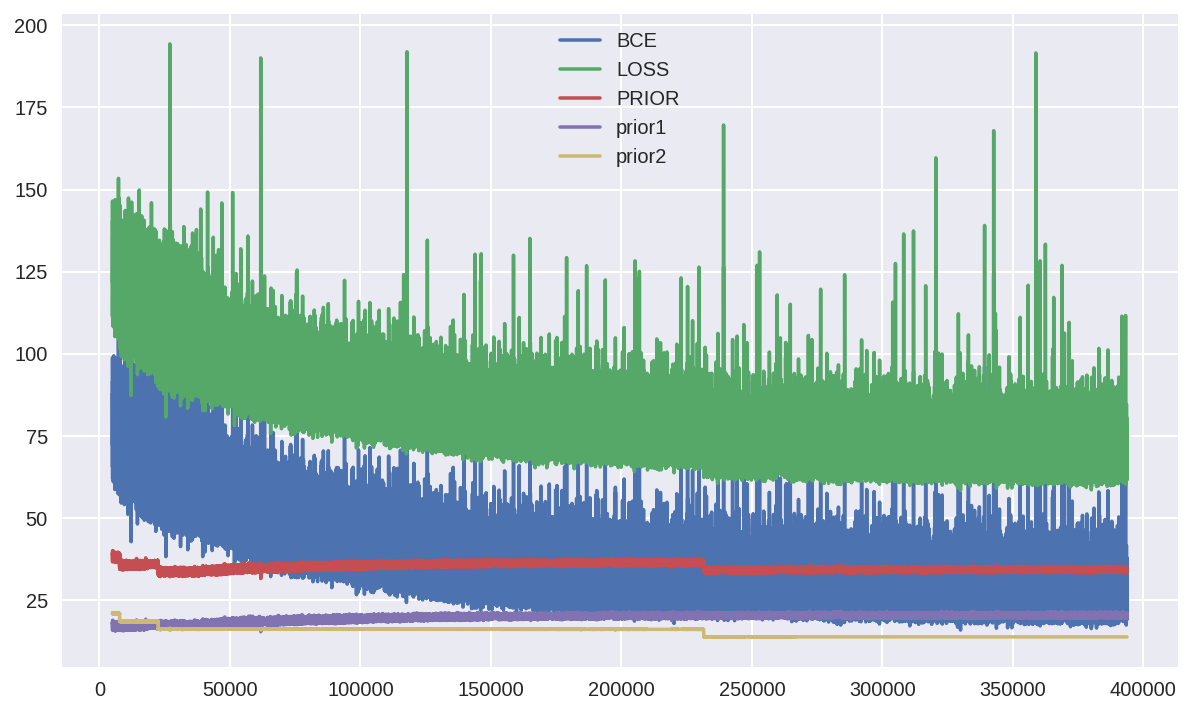

In [46]:
import pandas as pd
train = pd.DataFrame(convvsc.train_losses)
(train / dataset_params['batch_size']).iloc[5000:].plot(figsize=(10,6));

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision

def plot_image(img, ax, title):
    ax.imshow(np.transpose(img, (1,2,0)) , interpolation='nearest')
    ax.set_title(title, fontsize=20)
    
def to_numpy(image, vsc):
    return torchvision.utils.make_grid(
        image.view(1, vsc.channels, vsc.height, vsc.width)
    ).cpu().detach().numpy()
    
def plot_encoding(image, vsc, latent_sz, alpha, width=1/7):
    image = vsc.transform(image).to(vsc.device)
    decoded, mu, logvar, logspike = vsc.model.forward(image)
    z = vsc.model.reparameterize(mu, logvar, logspike)
    img = vsc.inverse_transform(vsc.model.decode(z))
    z = z.cpu().detach().numpy()[0]
    
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(9,4))
    
    plot_image(to_numpy(image, vsc), ax0, 'Input Image')
    
    ax1.bar(np.arange(latent_sz), height=z, width=width, align='center')
    ax1.scatter(np.arange(latent_sz), z, color='blue')
    ax1.set_title(r"Latent Dimension %d - $\alpha$ = %.2f " % \
                  (latent_sz, alpha), fontsize=14)
    
    plot_image(to_numpy(img, vsc), ax2, 'Decoded Image')
    plt.subplots_adjust(hspace=0.5)

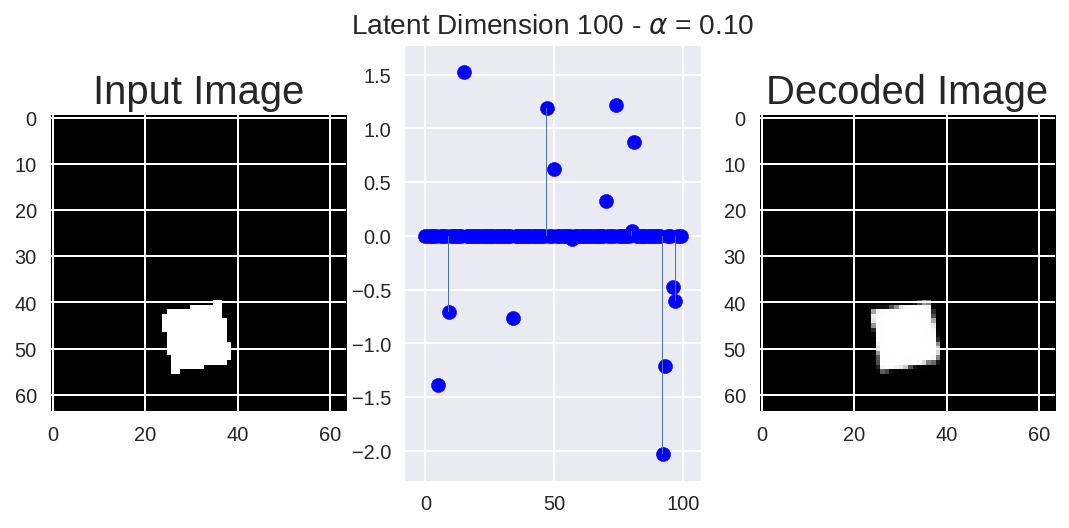

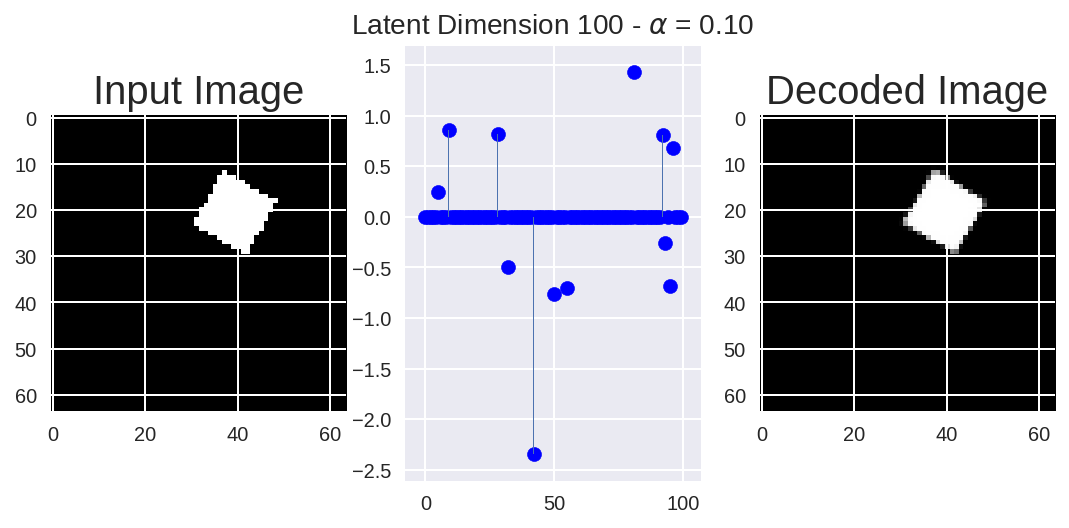

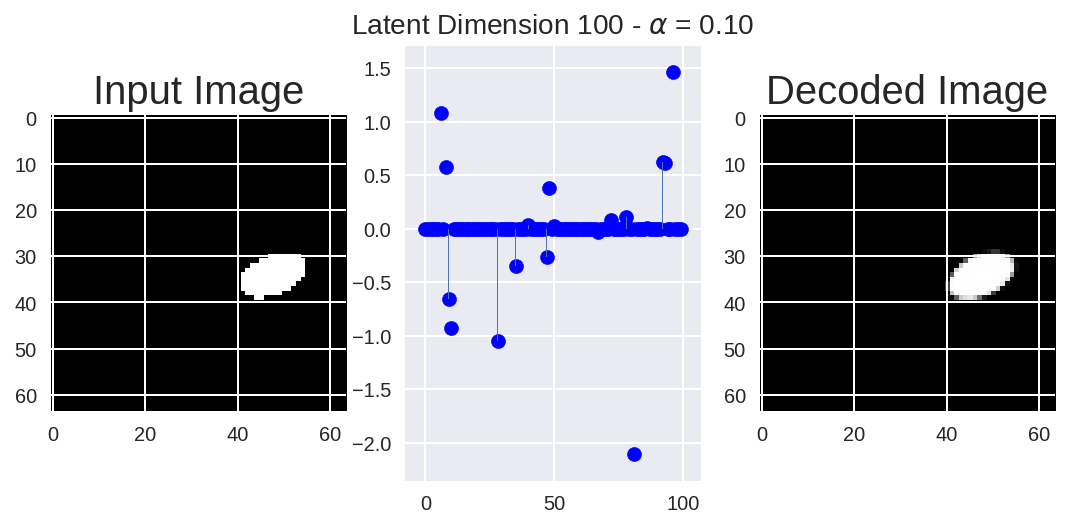

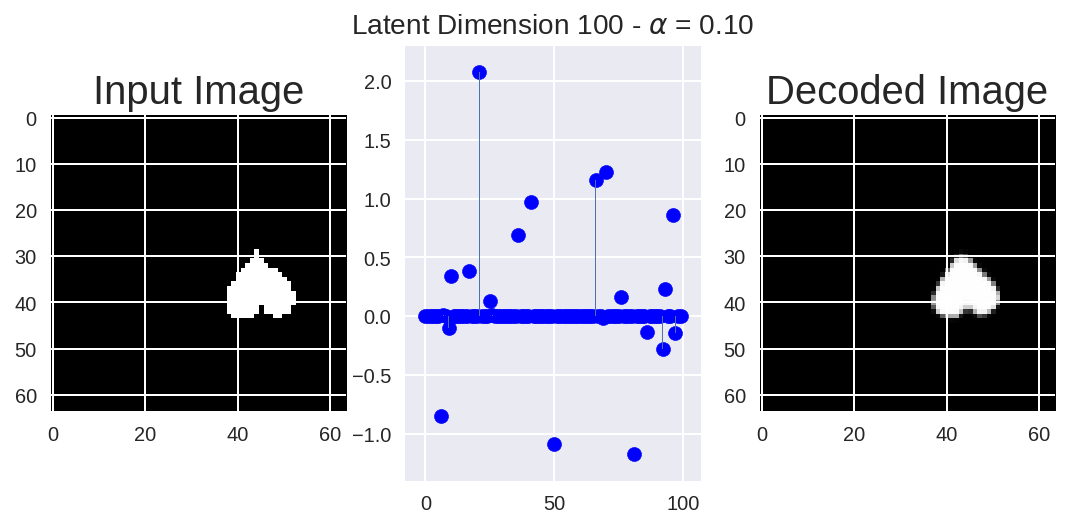

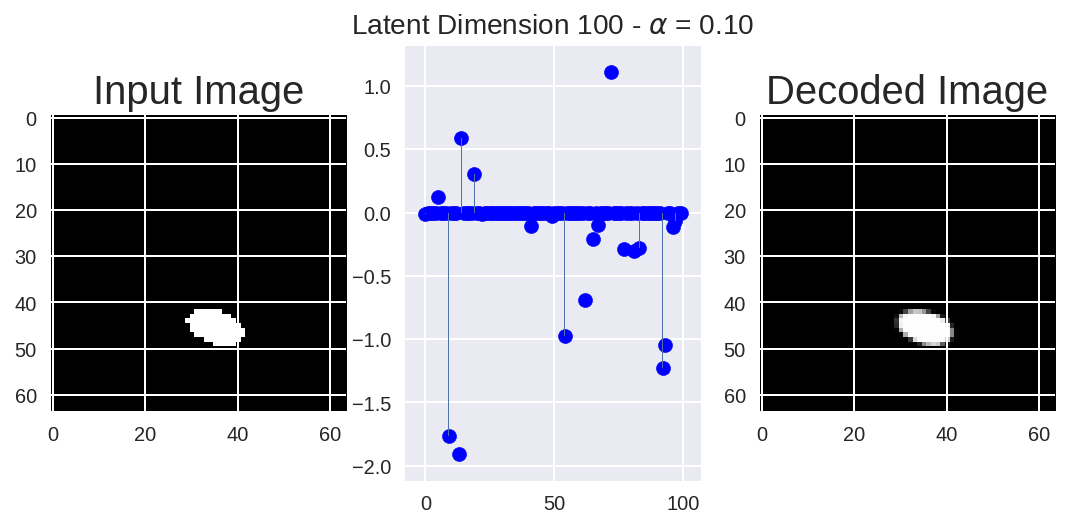

In [48]:
for i in range(5):
    plot_encoding(images[i][None,:], convvsc, 
                  model_params['latent_sz'], 
                  model_params['alpha'])

In [50]:
!ls data -lh

total 12K
drwxr-xr-x 5 root root 4.0K Mar 11 04:47 celeba
drwxr-xr-x 2 root root 4.0K Mar 11 03:46 dsprites
drwxr-xr-x 3 root root 4.0K Mar 11 04:12 mnist
